In [ ]:
!unzip ./Photos.zip

Archive:  ./Photos.zip
   creating: Photos/
  inflating: __MACOSX/._Photos       
  inflating: Photos/.DS_Store        
  inflating: __MACOSX/Photos/._.DS_Store  
   creating: Photos/Training/
  inflating: __MACOSX/Photos/._Training  
   creating: Photos/Testing/
  inflating: __MACOSX/Photos/._Testing  
   creating: Photos/Validation/
  inflating: __MACOSX/Photos/._Validation  
  inflating: Photos/Training/.DS_Store  
  inflating: __MACOSX/Photos/Training/._.DS_Store  
   creating: Photos/Training/Straight/
  inflating: __MACOSX/Photos/Training/._Straight  
   creating: Photos/Training/?/
  inflating: __MACOSX/Photos/Training/._?  
   creating: Photos/Training/Curly/
  inflating: __MACOSX/Photos/Training/._Curly  
   creating: Photos/Training/Tightly Curled/
  inflating: __MACOSX/Photos/Training/._Tightly Curled  
   creating: Photos/Training/Wavy/
  inflating: __MACOSX/Photos/Training/._Wavy  
  inflating: Photos/Testing/.DS_Store  
  inflating: __MACOSX/Photos/Testing/._.DS_Store  
 

In [ ]:
data_dir = './Photos/'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import pandas as pd
# Instantiate three image generator classes:
generators = ImageDataGenerator(
    rescale=1.0/255,
    data_format='channels_last')

In [ ]:
batch_size=8
train_generator = generators.flow_from_directory(
    directory=data_dir + 'Training',
    target_size=(224, 224),
    classes=['Straight','Wavy','Curly','Tightly Curled'],
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    seed=42)

valid_generator = generators.flow_from_directory(
    directory=data_dir + 'Validation',
    target_size=(224, 224),
    classes=['Straight','Wavy','Curly','Tightly Curled'],
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    seed=42)

test_generator = generators.flow_from_directory(
    directory=data_dir + 'Testing',
    target_size=(224, 224),
    classes=['Straight','Wavy','Curly','Tightly Curled'],
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    seed=42)

Found 900 images belonging to 4 classes.
Found 144 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [ ]:
def curlClass(modPredLst):
  countCurl = 0

  for ele in predictions:
    if (ele == 'Curly'):
      countCurl = countCurl + 1


  countStr = 0

  for ele in predictions:
    if (ele == 'Straight'):
      countStr = countStr + 1

  countW = 0

  for ele in predictions:
    if (ele == 'Wavy'):
      countW = countW + 1

  countTCurl = 0

  for ele in predictions:
    if (ele == 'Tightly Curled'):
      countTCurl = countTCurl + 1

  lab = max(countCurl, countStr, countW, countTCurl) #Shows the number

  if lab == countCurl:
    return "Curly"
  elif lab == countStr:
    return "Straight"
  elif lab == countW:
    return "Wavy"
  elif lab == countTCurl:
    return "Tightly Curled"


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten, Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf 
from keras.applications.vgg16 import VGG16
from keras.callbacks import ModelCheckpoint

from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

vgg16 = VGG16(include_top=False,
              weights='imagenet',
              input_shape=(224,224,3),
              pooling=None)

for layer in vgg16.layers:
    layer.trainable = False

2.8.0


In [ ]:
checkpoint_filepath = 'model.epoch{epoch:02d}-accuracy{val_accuracy:.2f}.hdf5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max')

# Instantiate the sequential model and add the VGG16 model: 
model = Sequential()
model.add(vgg16)

# Add the custom layers atop the VGG16 model: 
model.add(Flatten(name='flattened'))
model.add(Dense(units=4096,activation="relu"))
#model.add(Dense(units=4096,activation="relu"))
model.add(Dropout(0.5, name='dropout'))
model.add(Dense(4, activation='softmax', name='predictions'))

model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit_generator(train_generator, steps_per_epoch=15, 
                    epochs=20, validation_data=valid_generator, 
                    validation_steps=15, callbacks=[model_checkpoint_callback])

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


15/15 [==============================] - 11s 704ms/step - loss: 18.7169 - accuracy: 0.2917 - val_loss: 6.9830 - val_accuracy: 0.5083
Epoch 2/20
15/15 [==============================] - 10s 691ms/step - loss: 6.4068 - accuracy: 0.6552 - val_loss: 3.2294 - val_accuracy: 0.6250
Epoch 3/20
15/15 [==============================] - 10s 686ms/step - loss: 4.5563 - accuracy: 0.6167 - val_loss: 2.6456 - val_accuracy: 0.6500
Epoch 4/20
15/15 [==============================] - 10s 669ms/step - loss: 4.5837 - accuracy: 0.5833 - val_loss: 2.3969 - val_accuracy: 0.6417
Epoch 5/20
15/15 [==============================] - 10s 714ms/step - loss: 4.2531 - accuracy: 0.6833 - val_loss: 1.3371 - val_accuracy: 0.7417
Epoch 6/20
15/15 [==============================] - 10s 728ms/step - loss: 3.0157 - accuracy: 0.6750 - val_loss: 2.2162 - val_accuracy: 0.6667
Epoch 7/20
15/15 [==============================] - 10s 725ms/step - loss: 2.7190 - accuracy: 0.6833 - val_loss: 1.0664 - val_accuracy: 0.7667
Epoch 8/2

In [ ]:
model.load_weights('/content/model.epoch16-accuracy0.82.hdf5')

In [ ]:
model.evaluate(test_generator)

10/10 [==============================] - 2s 171ms/step - loss: 1.3458 - accuracy: 0.7625


[1.345801591873169, 0.762499988079071]

In [ ]:
vgg16.trainable = True

checkpoint_filepath = 'model1.epoch{epoch:02d}-accuracy{val_accuracy:.2f}.hdf5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max')

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit_generator(train_generator, steps_per_epoch=15, 
                    epochs=20, validation_data=valid_generator, 
                    validation_steps=15, callbacks=[model_checkpoint_callback])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  app.launch_new_instance()


Epoch 1/20
15/15 [==============================] - 11s 661ms/step - loss: 0.8804 - accuracy: 0.8333 - val_loss: 0.9057 - val_accuracy: 0.7750
Epoch 2/20
15/15 [==============================] - 10s 650ms/step - loss: 1.0801 - accuracy: 0.8167 - val_loss: 0.8026 - val_accuracy: 0.7833
Epoch 3/20
15/15 [==============================] - 9s 648ms/step - loss: 0.6497 - accuracy: 0.8417 - val_loss: 0.5386 - val_accuracy: 0.8583
Epoch 4/20
15/15 [==============================] - 9s 645ms/step - loss: 0.6310 - accuracy: 0.8833 - val_loss: 0.5813 - val_accuracy: 0.8000
Epoch 5/20
15/15 [==============================] - 10s 649ms/step - loss: 0.6605 - accuracy: 0.8333 - val_loss: 0.5205 - val_accuracy: 0.8750
Epoch 6/20
15/15 [==============================] - 10s 650ms/step - loss: 0.4947 - accuracy: 0.8917 - val_loss: 0.8695 - val_accuracy: 0.7417
Epoch 7/20
15/15 [==============================] - 9s 632ms/step - loss: 0.3038 - accuracy: 0.9138 - val_loss: 0.6586 - val_accuracy: 0.8250
Ep

In [ ]:
model.load_weights('/content/model1.epoch19-accuracy0.88.hdf5')

In [ ]:
model.evaluate(test_generator)

10/10 [==============================] - 5s 390ms/step - loss: 0.4898 - accuracy: 0.8250


[0.4898175299167633, 0.824999988079071]

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  app.launch_new_instance()


 1/15 [=>............................] - ETA: 23s - loss: 0.0549 - accuracy: 1.0000

KeyboardInterrupt: ignored

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.8.0


Please enter your image path (please ensure your image is a .jpg): /content/Talia1.JPG
This is your image:


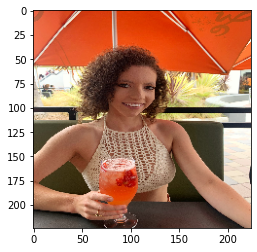

1/1 [==============================] - 0s 33ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


Thank you! Your hair type is: Tightly Curled.


KeyboardInterrupt: ignored

In [ ]:
while True:
    img_path = input('Please enter your image path (please ensure your image is a .jpg): ')
    if img_path[-4:].lower() != '.jpg':
        print('Please ensure your image has a .jpg extension.')
    else:
      break
print('This is your image:')

img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.show()

img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_batch)

pred=model.predict_generator(img_preprocessed,
steps=1,
verbose=1)

predicted_class_indices=np.argmax(pred,axis=1)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

hair_type = curlClass(predictions)

products = pd.read_excel('HairProds.xlsx')

curly = products[products['Curly'] == 1]
straight = products[products['Straight'] == 1]
wavy = products[products['Wavy'] == 1]
tc = products[products['Tightly Curled'] == 1]

curly_classes = list(curly['Class'].unique())
straight_classes = list(straight['Class'].unique())
wavy_classes = list(wavy['Class'].unique())
tc_classes = list(tc['Class'].unique())

classes = {'Curly': curly_classes, 'Straight': straight_classes, 
           'Wavy': wavy_classes, 'Tightly Curled':tc_classes}

curly_purposes = {}
for opt in curly_classes:
    curly_purposes[opt] = list(curly[curly['Class'] == opt]['Purpose'].unique())

straight_purposes = {}
for opt in straight_classes:
    straight_purposes[opt] = list(straight[straight['Class'] == opt]['Purpose'].unique())

wavy_purposes = {}
for opt in wavy_classes:
    wavy_purposes[opt] = list(wavy[wavy['Class'] == opt]['Purpose'].unique())
    
tc_purposes = {}
for opt in tc_classes:
    tc_purposes[opt] = list(tc[tc['Class'] == opt]['Purpose'].unique())
    
print(f'Thank you! Your hair type is: {hair_type.title()}.')
while True:
    product_interest = input(f'What type of product are you interested in?\nThe options for {hair_type.lower()} hair are: {classes[hair_type]}\n')
    product_interest = product_interest.lower()
    if product_interest not in classes[hair_type]:
        print('\nPlease check your spelling and reenter a valid product type.')
    else:
        break
        
while True:
    if hair_type == 'Curly':
        use_dictionary = curly_purposes
    if hair_type == 'Straight':
        use_dictionary = straight_purposes
    if hair_type == 'Wavy':
        use_dictionary = wavy_purposes
    if hair_type == 'Tightly Curled':
        use_dictionary = tc_purposes
    product_use = input(f'What is the most important feature for your {product_interest}?\nThe options are: {use_dictionary[product_interest]}\n')
    product_use = product_use.title()
    if product_use not in use_dictionary[product_interest]:
        print('\nPlease check your spelling and reenter a valid product feature.')
    else:
        break

recs = products[(products[hair_type] == 1) & (products['Class'] == product_interest) & (products['Purpose'] == product_use)]
recs.reset_index(inplace = True)

print(f'Thank you! You have indicated that you are interested in {product_interest} with a {product_use.lower()} feature.')
print(f'We recommend:')
for row in range(recs.shape[0]):
    print(recs['Title'][row], 'which has an overall consumer rating of', recs['Product Rating'][row])

# Utilize lime to explain the algorithm and assess what areas it's identifying in an image, and which areas it's ignoring

In [ ]:
# Lime Attempt
import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
print('Notebook run using keras:', keras.__version__)

Notebook run using keras: 2.8.0


In [ ]:
inet_model = inc_net.InceptionV3()

96124928/96112376 [==============================] - 1s 0us/step


In [ ]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

In [ ]:
img = image.load_img(img_path, target_size=(299, 299))
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_batch)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


49152/35363 [=========================================] - 0s 0us/step
('n06359193', 'web_site', 1.0)
('n02442845', 'mink', 4.915329e-13)
('n03481172', 'hammer', 4.1640153e-14)
('n04325704', 'stole', 3.4255263e-14)
('n04328186', 'stopwatch', 2.503395e-16)


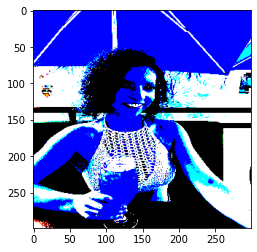

In [ ]:
#Get top 5 predictions from an image
images = img_preprocessed
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.imshow(images[0] / 2 + 0.5)
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

In [ ]:
#Explanation
!pip install lime
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join("/content/Niomi.jpg")) # add the current directory
    import lime

from lime import lime_image

     |████████████████████████████████| 275 kB 14.1 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=08213ba8973fe7640cb9f87a101bb78813e164159b24a8e68c6024e040b5edce
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
explainer = lime_image.LimeImageExplainer()

In [ ]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0].astype('double'), inet_model.predict, top_labels=5, hide_color=0, num_samples=1000)


  0%|          | 0/1000 [00:00<?, ?it/s]

CPU times: user 45.7 s, sys: 1.46 s, total: 47.2 s
Wall time: 51.9 s


In [ ]:
#Explanation for the top class
from skimage.segmentation import mark_boundaries

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


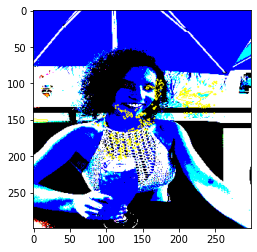

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


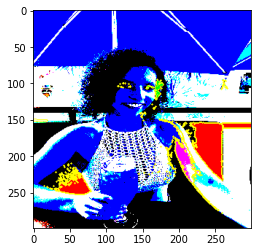

In [ ]:
#Shows the pros and cons
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

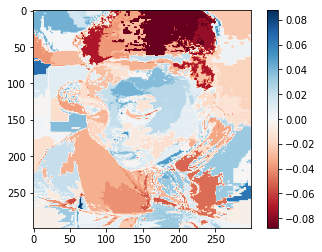

In [ ]:
#Or you can show a heat map visualization
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

# Create the Recommender System using the pantene database
## Prioritizing of choicing


*   Hair type (lab)
*   Product needed
*   Which attribute they need (repair, strengthen)
*   If still not detemined by 1 product, then use highest rated product

